n_digits: 10, 	 n_samples 1797, 	 n_features 64
[[  4.30531635  -8.21999463]
 [ 22.59821058  -0.29331437]
 [-12.88682933  11.31402839]
 [  1.46391936  21.60847347]
 [-14.07046856  -6.97635623]
 [ -3.6300527    0.4307866 ]
 [ 15.94703855  12.96440268]
 [  9.35275087 -19.32756437]
 [-22.0921491    5.74484218]
 [ -3.71815013 -16.94094416]]
[[-22.0921491  -19.32756437]
 [-14.07046856 -16.94094416]
 [-12.88682933  -8.21999463]
 [ -3.71815013  -6.97635623]
 [ -3.6300527   -0.29331437]
 [  1.46391936   0.4307866 ]
 [  4.30531635   5.74484218]
 [  9.35275087  11.31402839]
 [ 15.94703855  12.96440268]
 [ 22.59821058  21.60847347]]


[]

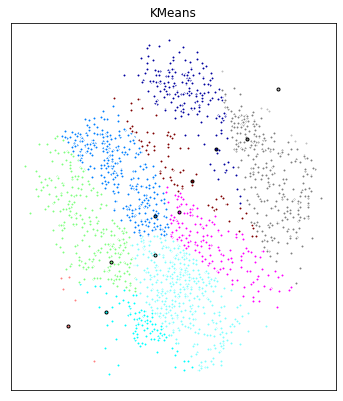

In [1]:
%matplotlib inline
from time import time
import numpy as np
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances_argmin

np.random.seed(30)

digits = load_digits()

data = digits.data

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
n_clusters=n_digits
labels = digits.target
sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))
# print(digits)
def evalution(estimator,name,data):
    t0 = time()
    estimator.fit(data)
    print('%-20s\t%.2fs\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0),
             metrics.normalized_mutual_info_score(labels,estimator.labels_),
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             ))
    print(np.unique(estimator.labels_))

reduced_data = PCA(n_components=2).fit_transform(data)
k_means = KMeans(init='random', n_clusters=10, n_init=10)
k_means.fit(reduced_data)
print(k_means.cluster_centers_)
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
print(k_means_cluster_centers)
k_means_labels = pairwise_distances_argmin(reduced_data, k_means_cluster_centers)


fig = plt.figure(figsize=(16, 6))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#FF8080', '#00FFFF', '#80FF80','#80FFFF','#0080FF','#FF00FF','#800000','#0000A0','#808080','#C0C0C0']
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(reduced_data[my_members, 0], reduced_data[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=3)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())

# evalution(KMeans(init='random', n_clusters=n_digits, n_init=10),
#               name="KMeans", data=data)

# evalution(MeanShift(),name="MeanShift",data=data)
# evalution(AffinityPropagation(),name="AffinityPropagation",data=data)



# evalution(SpectralClustering(n_clusters=n_digits,
#                              assign_labels="discretize",
#                              random_state=0),
#           name="SpectralClustering",
#           data=data)

# # evalution(AgglomerativeClustering(n_clusters=n_digits),name="AgglomerativeClustering",data=data)

# evalution(DBSCAN(eps=3, min_samples=10),name="DBSCAN",data=data)














